In [1]:
from pathlib import Path
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_rate = 48000

N = 512
hop_size = 256
window = np.hanning(N)

start = 21000
end = 22500

In [3]:
def overlap_waveforms(output, target, sample_rate, start, end, title):    
    i_zoom = i[start:end]
    o_zoom = o[start:end]
    t_zoom = t[start:end]

    # create time vector
    time = range(start, end)

    plt.figure(figsize=(10,5))
    plt.plot(time, o_zoom, alpha=0.5, label="Output")
    plt.plot(time, t_zoom, alpha=0.5, label="Target")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

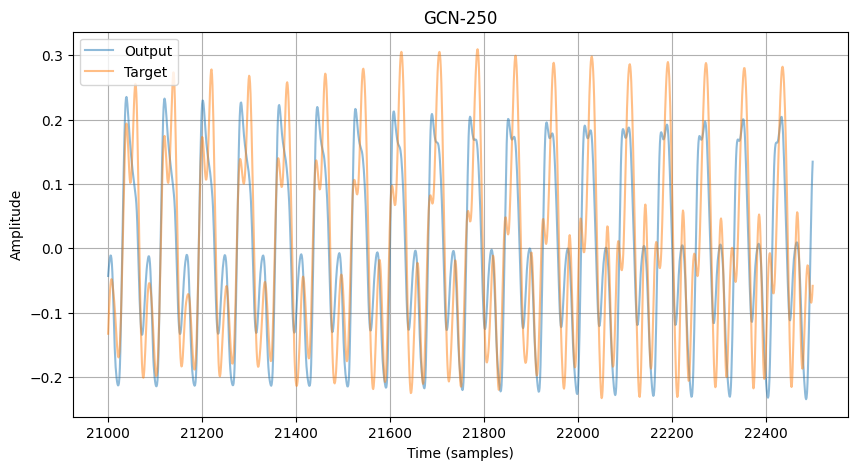

In [4]:
i_p, sample_rate = torchaudio.load("results/48k/test/gcn-250_20230824-224525_20230825_224119/inp_gcn-250.wav")
o_p, sample_rate = torchaudio.load("results/48k/test/gcn-250_20230824-224525_20230825_224119/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/48k/test/gcn-250_20230824-224525_20230825_224119/tgt_gcn-250.wav")

i = i_p.numpy().squeeze()
o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'GCN-250')

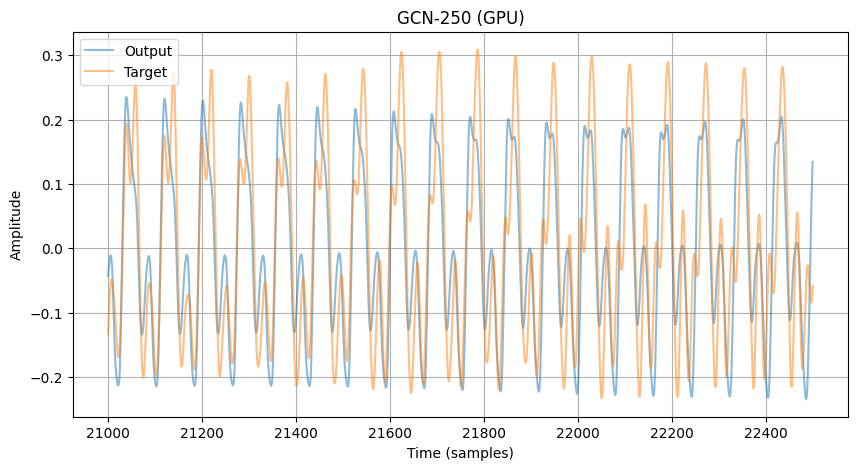

In [5]:
o_p_gpu, _ = torchaudio.load("results/48k/test_gpu/gcn-250_20230824-224525_20230825_164251/out_gcn-250.wav")
t_p_gpu, _ = torchaudio.load("results/48k/test_gpu/gcn-250_20230824-224525_20230825_164251/out_gcn-250.wav")

o_gpu = o_p_gpu.numpy().squeeze()
t_gpu = t_p_gpu.numpy().squeeze()

overlap_waveforms(o_gpu, t_gpu, sample_rate, start, end, 'GCN-250 (GPU)')

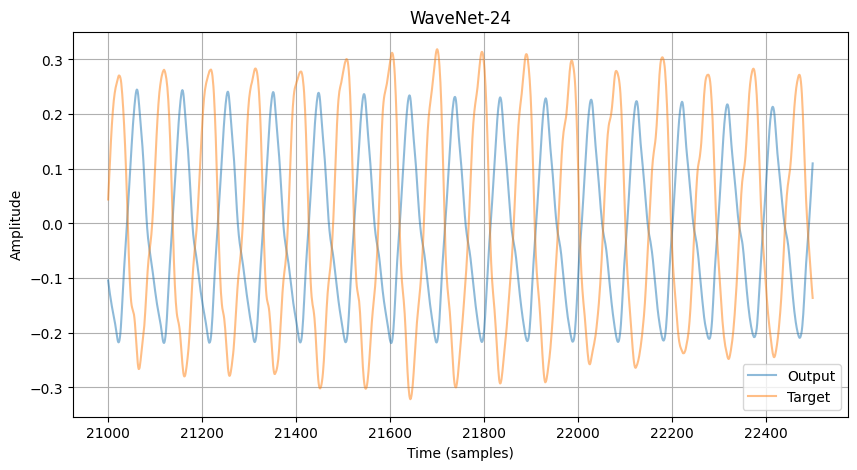

In [6]:
i_wn, sample_rate = torchaudio.load("results/48k/test/wavenet-24_20230825-003730_20230825_230850/inp_wavenet-24.wav")
o_wn, sample_rate = torchaudio.load("results/48k/test/wavenet-24_20230825-003730_20230825_230850/out_wavenet-24.wav")
t_wn, sample_rate = torchaudio.load("results/48k/test/wavenet-24_20230825-003730_20230825_230850/tgt_wavenet-24.wav")

i = i_wn.numpy().squeeze()
o = o_wn.numpy().squeeze()
t = t_wn.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'WaveNet-24')

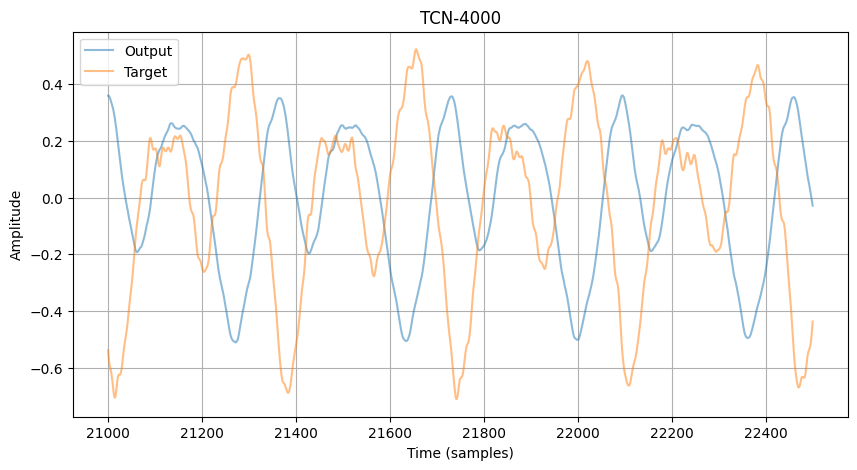

In [7]:
i_tcn, _ = torchaudio.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/inp_tcn-4000.wav")
o_tcn, _ = torchaudio.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/out_tcn-4000.wav")
t_tcn, _ = torchaudio.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/tgt_tcn-4000.wav")

i = i_tcn.numpy().squeeze()
o = o_tcn.numpy().squeeze()
t = t_tcn.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'TCN-4000')

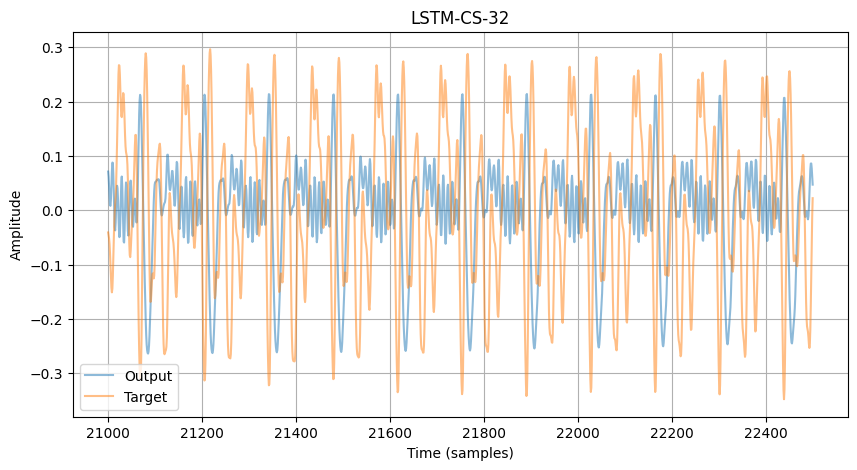

In [8]:
i_lstm32, _ = torchaudio.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/inp_lstm-cs-32.wav")
o_lstm32, _ = torchaudio.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/out_lstm-cs-32.wav")
t_lstm32, _ = torchaudio.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/tgt_lstm-cs-32.wav")

i = i_lstm32.numpy().squeeze()
o = o_lstm32.numpy().squeeze()
t = t_lstm32.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'LSTM-CS-32')

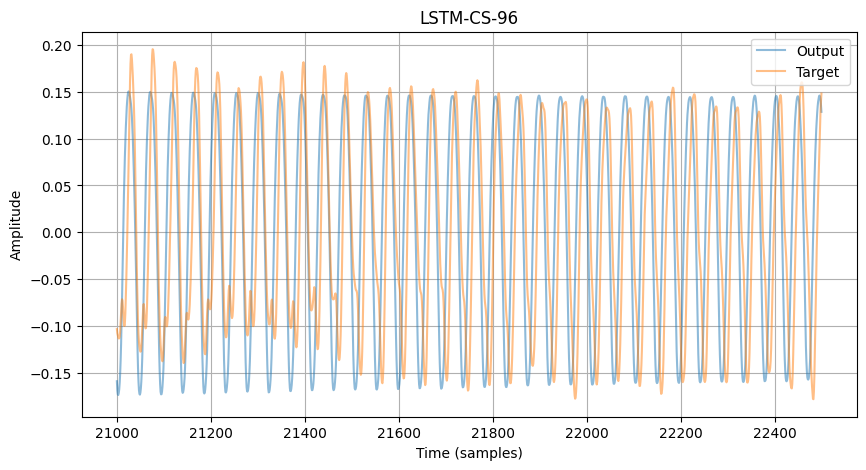

In [9]:
i_lstm96, _ = torchaudio.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/inp_lstm-cs-96.wav")
o_lstm96, _ = torchaudio.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/out_lstm-cs-96.wav")
t_lstm96, _ = torchaudio.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/tgt_lstm-cs-96.wav")

i = i_lstm96.numpy().squeeze()
o = o_lstm96.numpy().squeeze()
t = t_lstm96.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'LSTM-CS-96')

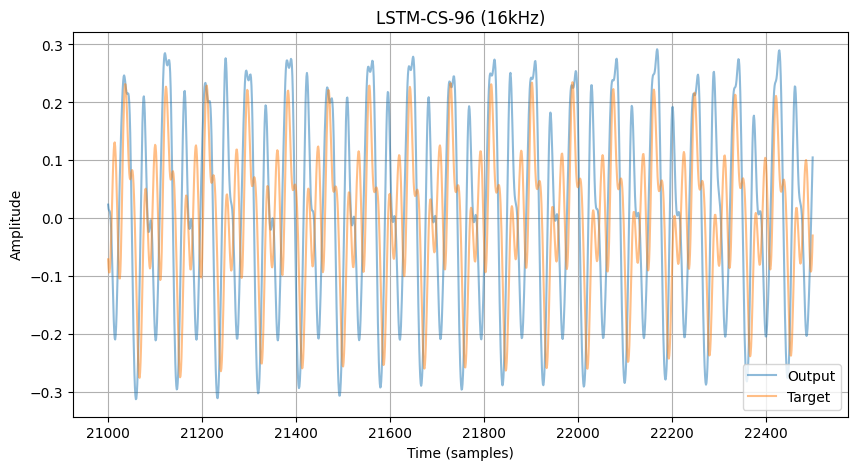

In [10]:
o_lstm_16k, _ = torchaudio.load("results/16k/test/lstm-cs-96_20230824-160004_20230825_211435/out_lstm-cs-96.wav")
t_lstm_16k, _ = torchaudio.load("results/16k/test/lstm-cs-96_20230824-160004_20230825_211435/tgt_lstm-cs-96.wav")

o = o_lstm_16k.numpy().squeeze()
t = t_lstm_16k.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'LSTM-CS-96 (16kHz)')

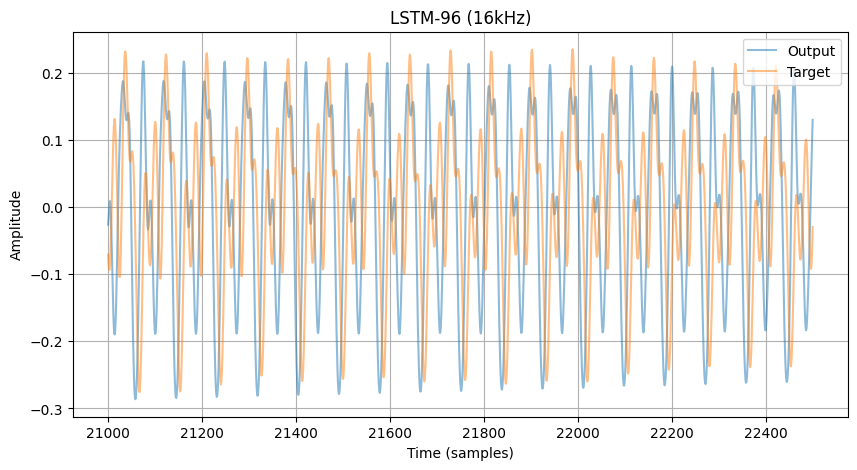

In [11]:
o_lstm_96_leg, _ = torchaudio.load("results/16k/test/LSTM-96_1000_32_0.001_20230810-062251_20230825_213120/inp_LSTM-96.wav")
t_lstm_96_leg, _ = torchaudio.load("results/16k/test/LSTM-96_1000_32_0.001_20230810-062251_20230825_213120/tgt_LSTM-96.wav")

o = o_lstm_96_leg.numpy().squeeze()
t = t_lstm_96_leg.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, 'LSTM-96 (16kHz)')

/Users/francescopapaleo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7776: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


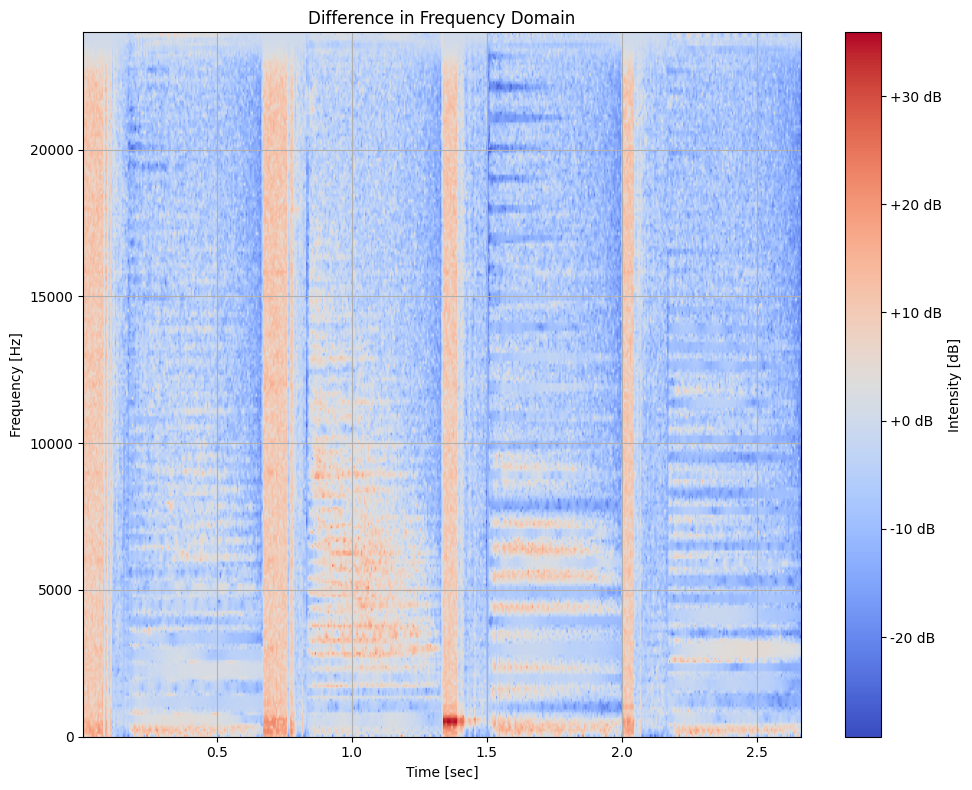

In [12]:
max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))


# 1. Compute the STFT for both signals
Pxx_o, freqs_o, t_o, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_t, freqs_t, t_t, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()
# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_t + 1e-7) - 10 * np.log10(Pxx_o + 1e-7)  # Convert to dB and then subtract

# difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o[0], t_o[-1], freqs_o[0], freqs_o[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

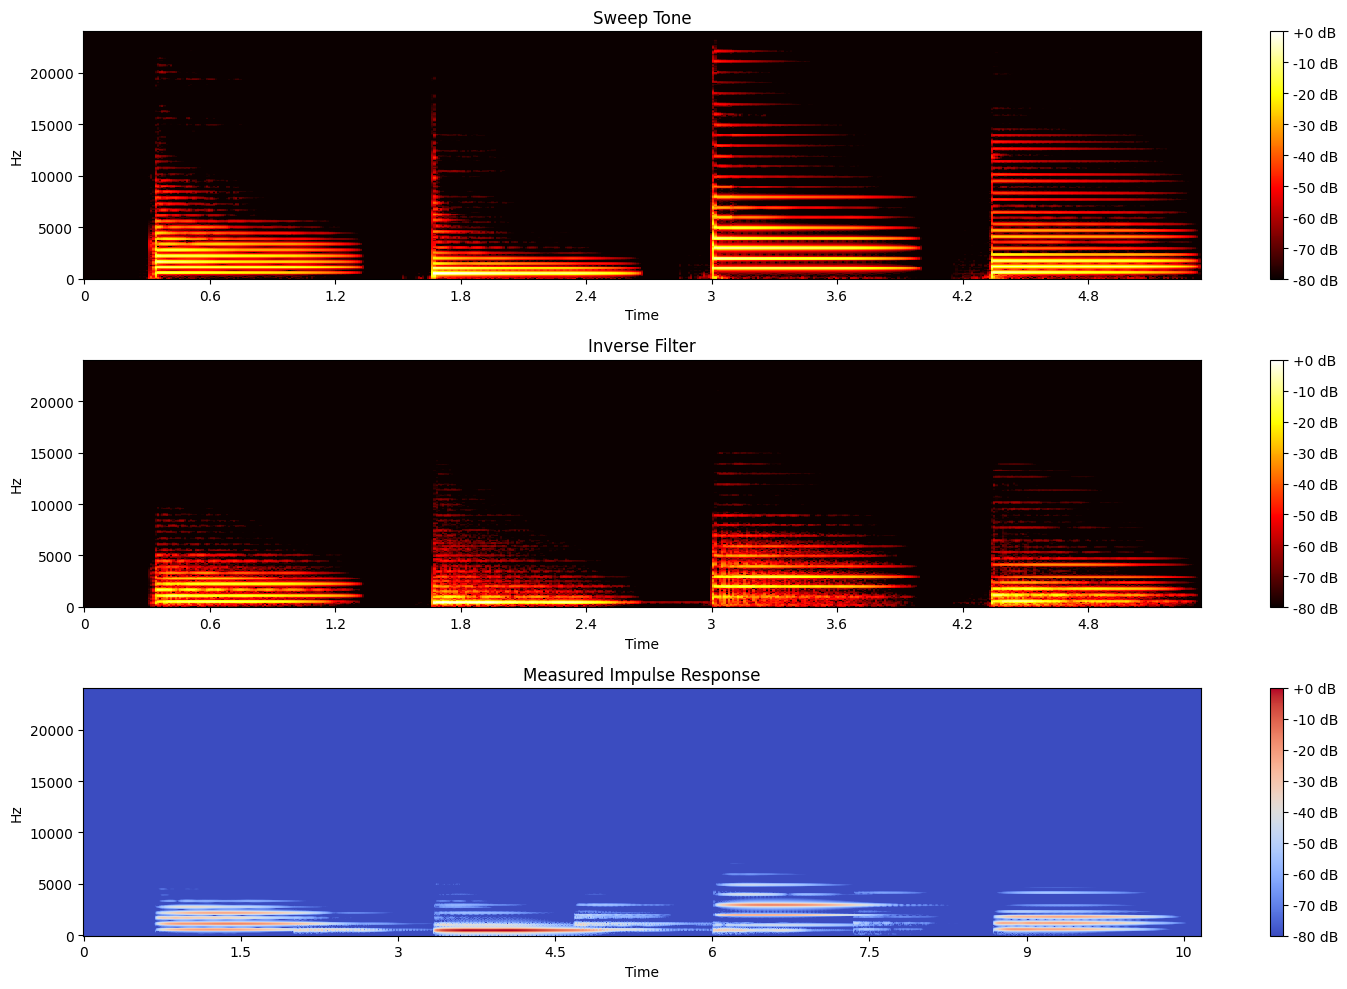

In [13]:
import librosa

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Setting sample rate and STFT parameters
sample_rate = 48000
n_fft_value = 512  # Adjust as needed for frequency resolution
hop_length_value = 256  # Adjust as needed for time resolution

x = o
y = t
z = np.convolve(x, y, mode='full')

x_D = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)
y_D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)
z_D = librosa.amplitude_to_db(np.abs(librosa.stft(z, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)

# Visualizing the Output
x_img = librosa.display.specshow(x_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[0], cmap='hot')
axs[0].set_title('Sweep Tone')
fig.colorbar(x_img, ax=axs[0], format='%+2.0f dB')

# Visualizing the Target
y_img = librosa.display.specshow(y_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[1], cmap='hot')
axs[1].set_title('Inverse Filter')
fig.colorbar(y_img, ax=axs[1], format='%+2.0f dB')

# Visualizing the Difference
diff_img = librosa.display.specshow(z_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[2], cmap='coolwarm')
axs[2].set_title('Measured Impulse Response')
fig.colorbar(diff_img, ax=axs[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [14]:
def stft(x, n_fft=512, hop_length=256, window='hann'):
    return np.array([np.fft.rfft(np.hanning(len(x[i:i + n_fft])) * x[i:i + n_fft]) for i in range(0, len(x) - n_fft + 1, hop_length)])

o_stft = stft(o, n_fft=n_fft_value, hop_length=hop_length_value)
t_stft = stft(t, n_fft=n_fft_value, hop_length=hop_length_value)
z_stft = stft(z, n_fft=n_fft_value, hop_length=hop_length_value)

In [15]:
def mag_to_db(mag, ref=1.0, amin=1e-7):
    magnitude = np.abs(mag)
    log_spec = 20.0 * np.log10(np.maximum(amin, magnitude))
    log_spec -= 20.0 * np.log10(ref)
    return log_spec

o_db = mag_to_db(o_stft)
t_db = mag_to_db(t_stft)
z_db = mag_to_db(z_stft)

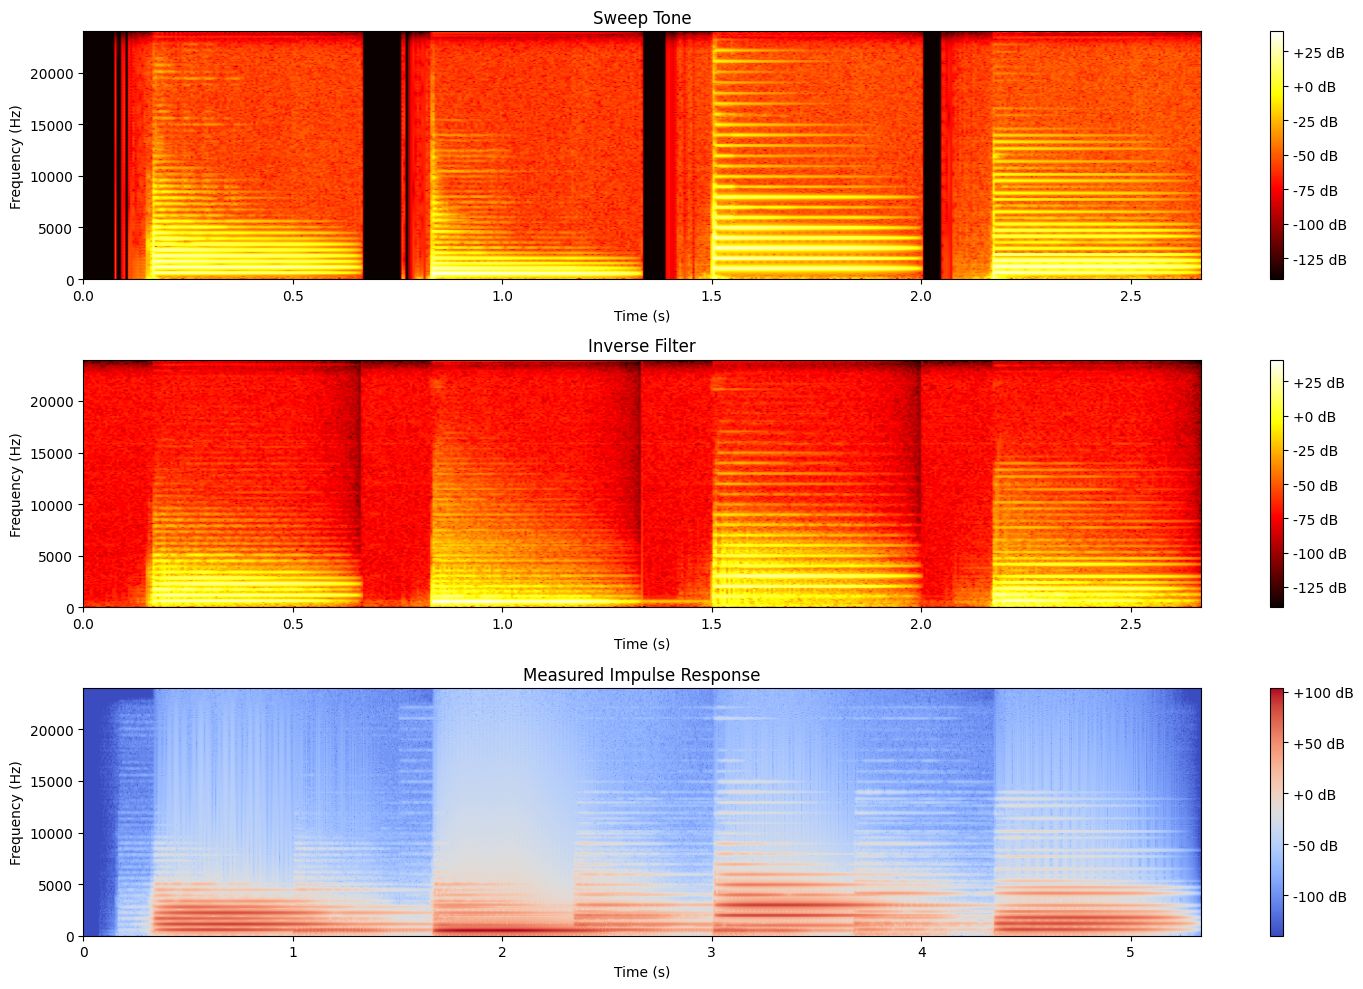

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

x_img = axs[0].imshow(o_db.T, origin='lower', aspect='auto', cmap='hot', extent=[0, len(o) / sample_rate, 0, sample_rate / 2])
axs[0].set_title('Sweep Tone')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlabel('Time (s)')
fig.colorbar(x_img, ax=axs[0], format='%+2.0f dB')

y_img = axs[1].imshow(t_db.T, origin='lower', aspect='auto', cmap='hot', extent=[0, len(t) / sample_rate, 0, sample_rate / 2])
axs[1].set_title('Inverse Filter')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
fig.colorbar(y_img, ax=axs[1], format='%+2.0f dB')

z_img = axs[2].imshow(z_db.T, origin='lower', aspect='auto', cmap='coolwarm', extent=[0, len(z) / sample_rate, 0, sample_rate / 2])
axs[2].set_title('Measured Impulse Response')
axs[2].set_ylabel('Frequency (Hz)')
axs[2].set_xlabel('Time (s)')
fig.colorbar(z_img, ax=axs[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()



In [17]:
def plot_impulse_with_zoom(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform and zoom in on the impulse.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Create plots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), data[start_index:end_index])
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Test with the impulse signal from the previous code snippet
plot_impulse_with_zoom(recorded, sample_rate)

NameError: name 'recorded' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def plot_impulse_and_spectrogram(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform, zoom in on the impulse, and display its traditional spectrogram.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Extract zoomed data
    zoomed_data = data[start_index:end_index]

    # Compute the spectrogram of the zoomed data
    f, t, Sxx = spectrogram(zoomed_data, fs=sample_rate)

    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), zoomed_data)
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    # Traditional spectrogram
    cmap = plt.get_cmap('inferno')
    min_magnitude = 10 * np.log10(np.min(Sxx))
    max_magnitude = 10 * np.log10(np.max(Sxx))
    for i in range(len(t)):
        magnitudes = 10 * np.log10(Sxx[:, i])
        normalized = (magnitudes - min_magnitude) / (max_magnitude - min_magnitude)
        colors = cmap(normalized)
        axs[2].vlines(t[i], f[0], f[-1], colors=colors, lw=2, linestyles='solid')
        
    axs[2].set_title("Spectrogram")
    axs[2].set_ylabel("Frequency [Hz]")
    axs[2].set_xlabel("Time [sec]")

    plt.tight_layout()
    plt.show()

# Replace the following with your actual data and sample rate.
plot_impulse_and_spectrogram(o_zoom, 48000)


In [ ]:
import torchaudio
torchaudio.backend.soundfile_backend.info("audio/gen/BX20_ableton.wav")